In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [2]:
# Load dataset
data = pd.read_csv('Salary_Data.csv')

In [3]:
# Explore basic info
print(data.head())
print(data.info())
print(data.describe())
print(data.isnull().sum())

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes
None
       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000
YearsExperience    0
Salary             0
dtype: int64


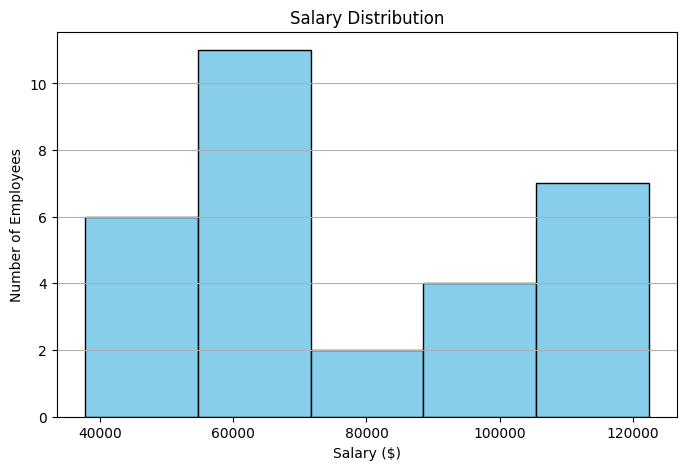

In [4]:
# Histogram of Salary
plt.figure(figsize=(8, 5))
plt.hist(data['Salary'], bins=5, color='skyblue', edgecolor='black')
plt.title('Salary Distribution')
plt.grid(axis='y')
plt.xlabel('Salary ($)')
plt.ylabel('Number of Employees')
plt.show()


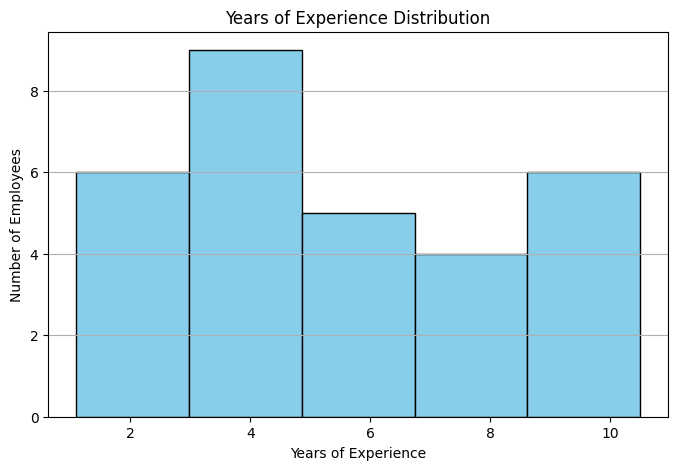

In [5]:
# Histogram of Years of Experience
plt.figure(figsize=(8, 5))
plt.hist(data['YearsExperience'], bins=5, color='skyblue', edgecolor='black')
plt.title('Years of Experience Distribution')
plt.grid(axis='y')
plt.xlabel('Years of Experience')
plt.ylabel('Number of Employees')
plt.show()


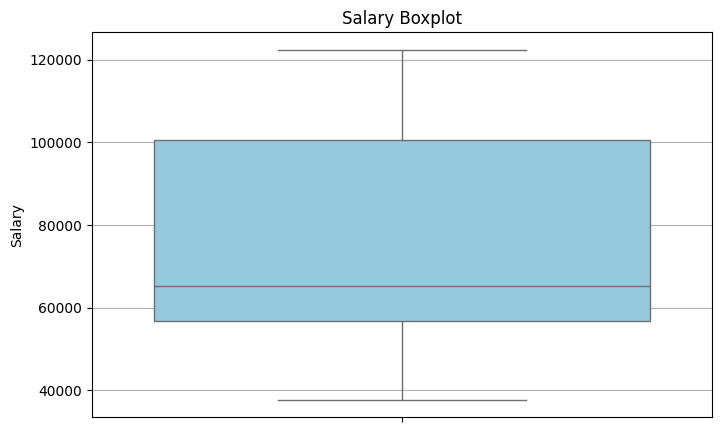

In [6]:
# Boxplot of Salary
plt.figure(figsize=(8, 5))
sns.boxplot(y='Salary', data=data, color='skyblue')
plt.title('Salary Boxplot')
plt.grid(axis='y')
plt.show()

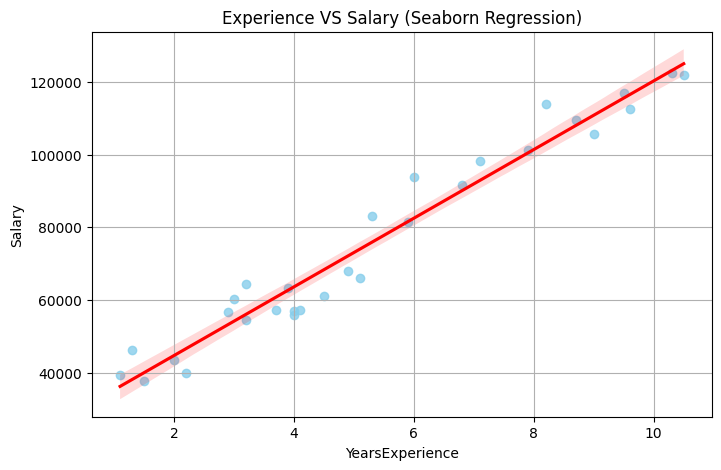

In [7]:
# Regression line with scatter (Seaborn)
plt.figure(figsize=(8, 5))
sns.regplot(x='YearsExperience', y='Salary', data=data, color='skyblue', line_kws={'color': 'red'})
plt.title('Experience VS Salary (Seaborn Regression)')
plt.grid()
plt.show()


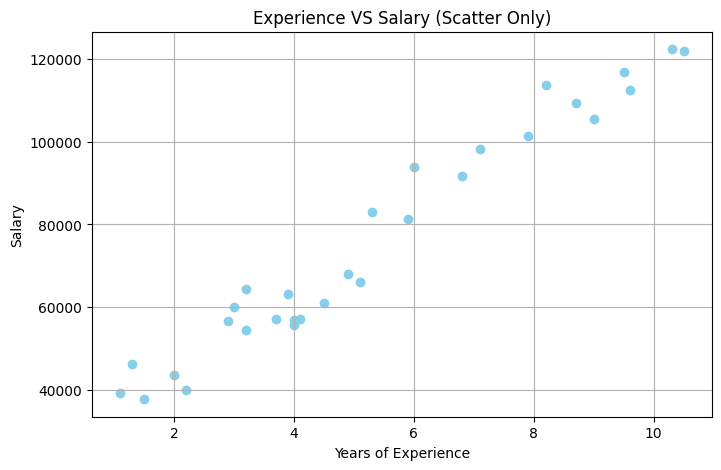

In [8]:
# Scatter Plot of all data
plt.figure(figsize=(8, 5))
plt.scatter(data['YearsExperience'], data['Salary'], color='skyblue')
plt.title('Experience VS Salary (Scatter Only)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid()
plt.show()

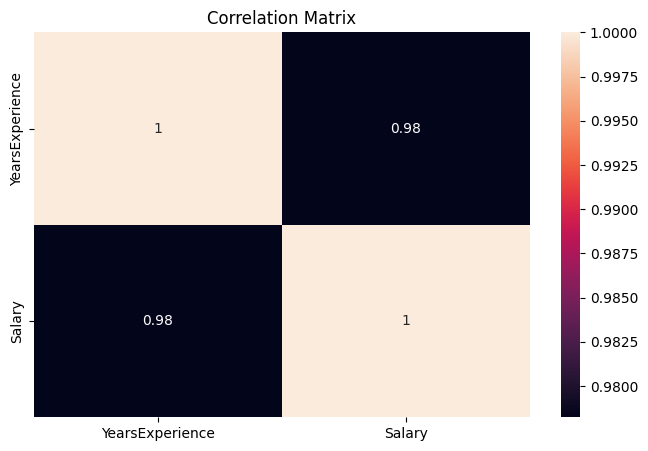

In [9]:
# Correlation Matrix
plt.figure(figsize=(8, 5))
sns.heatmap(data.corr(numeric_only=True), annot=True)
plt.title('Correlation Matrix')
plt.show()

In [10]:
# Feature selection
X = data[['YearsExperience']]
y = data['Salary']

In [11]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
# Linear Regression
model = LinearRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)

In [14]:
# Linear Regression Metrics
MAE = mean_absolute_error(y_test, predictions)
MSE = mean_squared_error(y_test, predictions)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test, predictions)

print("Linear Regression Results")
print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)
print("R2 Score:", r2)

Linear Regression Results
MAE: 5161.328710400183
MSE: 37784662.46621314
RMSE: 6146.92300799458
R2 Score: 0.9414466227178214


In [15]:
# Polynomial Regression
poly_model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
poly_model.fit(x_train, y_train)
predictions_poly = poly_model.predict(x_test)


In [16]:
# Polynomial Regression Metrics
MAE_poly = mean_absolute_error(y_test, predictions_poly)
MSE_poly = mean_squared_error(y_test, predictions_poly)
RMSE_poly = np.sqrt(MSE_poly)
r2_poly = r2_score(y_test, predictions_poly)

print("\nPolynomial Regression Results")
print("MAE:", MAE_poly)
print("MSE:", MSE_poly)
print("RMSE:", RMSE_poly)
print("R2 Score:", r2_poly)


Polynomial Regression Results
MAE: 4632.459103715933
MSE: 33481265.377729766
RMSE: 5786.2998001944015
R2 Score: 0.9481154247361618


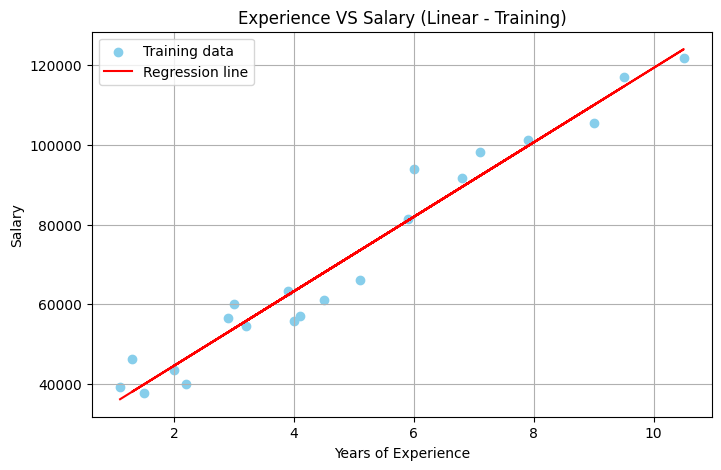

In [17]:
# Plot Linear Regression (Training)
plt.figure(figsize=(8, 5))
plt.scatter(x_train, y_train, color='skyblue', label='Training data')  # Training data scatter
plt.plot(x_train, model.predict(x_train), color='red', label='Regression line')  # Linear line
plt.title('Experience VS Salary (Linear - Training)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid()
plt.show()


C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


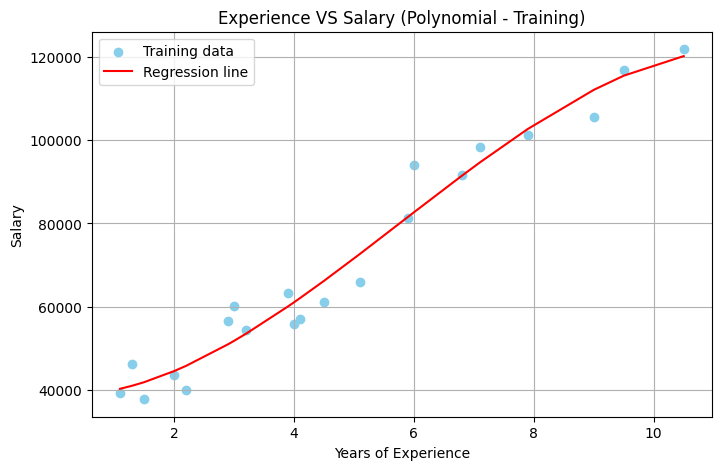

In [20]:
# Plot Polynomial Regression (Training)
plt.figure(figsize=(8, 5))
plt.scatter(x_train, y_train, color='skyblue', label='Training data')  # Training data scatter
x_sorted_train = np.sort(x_train, axis=0)
plt.plot(x_sorted_train, poly_model.predict(x_sorted_train), color='red', label='Regression line')  # Polynomial curve
plt.title('Experience VS Salary (Polynomial - Training)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid()
plt.show()

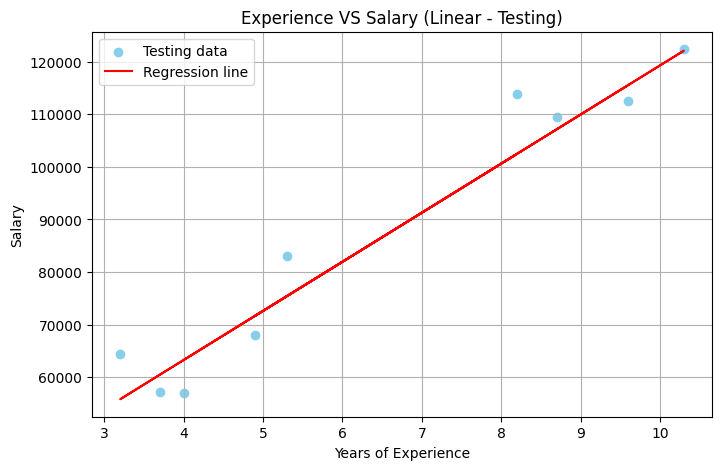

In [21]:
# Plot Linear Regression (Testing)
plt.figure(figsize=(8, 5))
plt.scatter(x_test, y_test, color='skyblue', label='Testing data')  # Testing data scatter
plt.plot(x_test, predictions, color='red', label='Regression line')  # Linear line
plt.title('Experience VS Salary (Linear - Testing)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid()
plt.show()

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


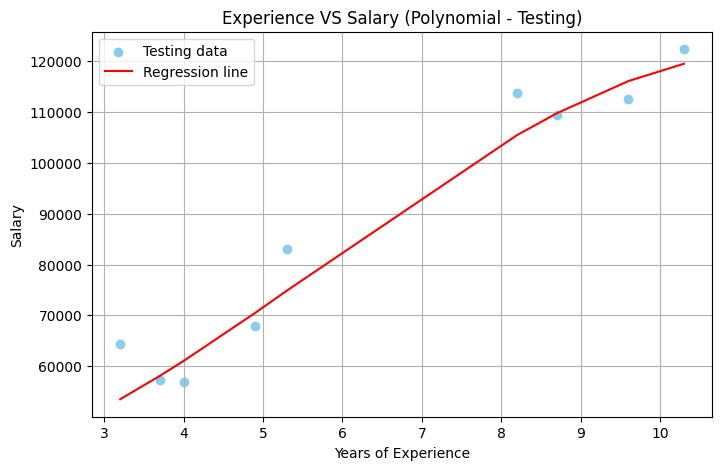

In [22]:
# Plot Polynomial Regression (Testing)
plt.figure(figsize=(8, 5))
plt.scatter(x_test, y_test, color='skyblue', label='Testing data')  # Testing data scatter
x_sorted_test = np.sort(x_test, axis=0)
plt.plot(x_sorted_test, poly_model.predict(x_sorted_test), color='red', label='Regression line')  # Polynomial curve
plt.title('Experience VS Salary (Polynomial - Testing)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid()
plt.show()